# SIRS Model Delay (Hethcote Model)

In [1]:
using DifferentialEquations
using QuadGK
using Plots
#using Interact
using Measures
gr()

Plots.GRBackend()

In [2]:
function SIRSDelay(du,u,h,p,t)
du[1] = -p[1]*u[1]*u[2]+p[2]*h(p,t-p[3])[2]
du[2] = p[1]*u[1]*u[2]-p[2]*u[2]
end

# Initial function

h(p, t) =[0.999,0.001] 
u0 = [0.999,0.001]
## Initial function

p=[1.8,1.0,15.0]
lags = [p[3]]
tspan = (0.0,300.0)

prob = DDEProblem(SIRSDelay,u0,h,tspan,p; constant_lags=lags)

#sol = solve(prob)
alg = MethodOfSteps(Tsit5())
sol = solve(prob,alg,reltol=1e-6)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 329-element Array{Float64,1}:
   0.0                
   0.10825138757175957
   0.39909966320094253
   0.7887310026675434 
   1.241016302666266  
   1.760609243801135  
   2.323469338378801  
   2.918790825737701  
   3.5317330592016054 
   4.155623114531349  
   4.790105361902262  
   5.449258621172772  
   6.173655276830306  
   ⋮                  
 291.6125654292714    
 292.4987293114319    
 293.372897872422     
 294.2558812626163    
 295.02450681956316   
 295.7879501061184    
 296.50697423188103   
 297.28292034610973   
 298.02707724529256   
 298.7852738764846    
 299.59440302957546   
 300.0                
u: 329-element Array{Array{Float64,1},1}:
 [0.999, 0.001]        
 [0.998905, 0.00109024]
 [0.998554, 0.00137495]
 [0.997815, 0.00187549]
 [0.996435, 0.00268694]
 [0.993861, 0.00405372]
 [0.9893, 0.00630651]  
 [0.98143, 0.00999913] 
 [0.968347, 0.0158903] 
 [0.947312, 0.0249865] 
 [0.914653, 

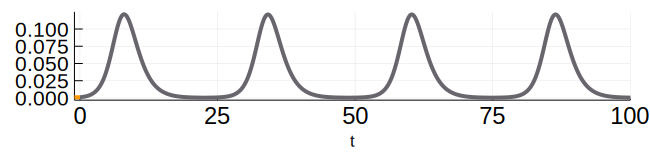

In [3]:
plot(sol,
    vars=(0,2),
    linewidth=4,
    color="#6a656d",
    label="x",
    xtickfont = font(16),
#    xticks = 0:2:200,
 legend=false,
    ytickfont = font(14),
    size=(650,160),
    bottom_margin=3mm,
    right_margin=3mm) 
x = range(-1,stop=0,length=10)
plot!(x,x->0.001,
    linewidth=4,
    color="#FF9900",label="x init")
plot!(xlim=(-1,100))

In [4]:
savefig("SIRSDelay3.pdf")

In [5]:
anim=@animate for i=1:250
tspan = (0.0,i*1.0)
prob = DDEProblem(SIRSDelay,u0,h,tspan,p; constant_lags=lags)
    
sol = solve(prob,alg,reltol=1e-6);
    
theme(:default)
plot(sol,
    vars=(0,1),
    linewidth=4,
    color="#6a656d",
    label="",
    xtickfont = font(16),
    xticks = 0:50:240,
#    xlim=(0,250),
    ylim=(-10,20),
    ytickfont = font(16)) 
x = range(-1,stop=0,length=10)
plot!(x,x->1.0,
    linewidth=4,
    color="#FF9900",
        label=""
    )
plot!(xlim=(-1,250))
end

Animation("/var/folders/p6/2y21smx94031_tp3fny44xn40000gn/T/tmpJ93Oiw", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000241.png", "000242.png", "000243.png", "000244.png", "000245.png", "000246.png", "000247.png", "000248.png", "000249.png", "000250.png"])

In [6]:
gif(anim, "anim.gif", fps = 20)

┌ Info: Saved animation to 
│   fn = /Users/ynakata/Box Sync/Program/Julia_MacbookPro/ScalarDDE/anim.gif
└ @ Plots /Users/ynakata/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/ynakata/Box Sync/Program/Julia_MacbookPro/ScalarDDE/anim.gif")

In [7]:
anim=@animate for i=0:20
    
p=[2.5,1.0,i*0.5]

prob = DDEProblem(SIRSDelay,u0,h,tspan,p; constant_lags=lags)

sol = solve(prob,alg,reltol=1e-6)
    
plot(sol,
    vars=(0,2),
    linewidth=4,
    color="#6a656d",
    xtickfont = font(16),
    legendtitle="tau=$(i*0.5)",
    label="",
    ytickfont = font(16),
    ylim=(0,1.0),
    legendfontsize=12) # legend=false
x = range(-1,stop=0,length=10)
plot!(x,x->0.001,
    linewidth=4,
    color="#FF9900",
        label=""
    )
plot!(xlim=(-1,100))
end

Animation("/var/folders/p6/2y21smx94031_tp3fny44xn40000gn/T/tmp8hUGzO", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000012.png", "000013.png", "000014.png", "000015.png", "000016.png", "000017.png", "000018.png", "000019.png", "000020.png", "000021.png"])

In [8]:
gif(anim, "anim_delay_SIRS.gif", fps = 1)

┌ Info: Saved animation to 
│   fn = /Users/ynakata/Box Sync/Program/Julia_MacbookPro/ScalarDDE/anim_delay_SIRS.gif
└ @ Plots /Users/ynakata/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/ynakata/Box Sync/Program/Julia_MacbookPro/ScalarDDE/anim_delay_SIRS.gif")